<a href="https://colab.research.google.com/github/Pimamorn/P/blob/Test/1_Oct_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install necessary libraries
!pip install pyxdf
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.3 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import mne
import pyxdf
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S004_NoTSSVEp_task-Default_run-001_eeg.xdf'  # Adjust the file path as necessary

# Function to load data from an XDF file
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # Locate the EEG and Marker streams
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # Extract EEG data
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # Extract markers if available
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# Function to create a Bandpass Filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to filter signal with Bandpass Filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Function to plot Power Spectrum with FFT and target frequencies in segmented ranges with markers
def plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, title_prefix, color='blue', target_freqs=[5, 7], bandwidth=2):
    # Define frequency ranges for segmentation
    freq_ranges = [
        (0, 6),   # Low frequencies
        #(3, 5),  # Mid frequencies
        (6, 10)   # High frequencies
    ]

    plt.figure(figsize=(15, 20))

    for i, channel in enumerate(channels):
        if channel in df.columns:
            signal = df[channel].values

            # Filter signal with Bandpass Filter (1-50 Hz)
            filtered_signal = bandpass_filter(signal, 1, 50, sampling_rate)

            # FFT of the filtered signal
            N = len(filtered_signal)
            T = 1.0 / sampling_rate
            yf = fft(filtered_signal)
            xf = np.fft.fftfreq(N, T)[:N // 2]
            power_spectrum = 2.0 / N * np.abs(yf[:N // 2])

            # Create subplots for each frequency range
            for j, (low_freq, high_freq) in enumerate(freq_ranges):
                plt.subplot(len(channels), len(freq_ranges), i * len(freq_ranges) + j + 1)
                mask = (xf >= low_freq) & (xf < high_freq)  # Frequency mask
                plt.plot(xf[mask], power_spectrum[mask], color=color)
                plt.title(f'{title_prefix} {channel} ({low_freq}-{high_freq} Hz)')
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Power')
                plt.xlim(low_freq, high_freq)  # Set frequency range
                plt.xticks(np.arange(low_freq, high_freq + 1, 2))  # Adjust ticks

                # Highlight target frequencies
                for target_freq in target_freqs:
                    if low_freq <= target_freq <= high_freq:
                        plt.axvspan(target_freq - bandwidth, target_freq + bandwidth, color='orange', alpha=0.3, label=f'Target: {target_freq} Hz')

                # Add markers for segment intervals
                plt.axvline(x=low_freq, color='green', linestyle='--', linewidth=1, label='Segment Start')
                plt.axvline(x=high_freq, color='purple', linestyle='--', linewidth=1, label='Segment End')

                # Mark triggers with vertical lines
                if markers:  # Check if markers exist
                    for timestamp, marker in markers:
                        plt.axvline(x=timestamp, color='red', linestyle='--', label=f'Trigger {marker[0]}')
                        plt.legend(loc='upper right')

                plt.legend()
        else:
            print(f'Warning: {channel} not found in data columns.')

    plt.tight_layout()

# Load data from XDF file
df, sampling_rate, markers = load_data(file_path)

# Show markers for verification
print("Markers from File:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# Select channels to plot
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Plot Power Spectrum with segmented frequency ranges and segment markers
plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, 'File', color='blue', target_freqs=[5, 7], bandwidth=2)

# Show the plot
1plt.show()

SyntaxError: invalid decimal literal (<ipython-input-2-0f6b94702cb1>, line 138)

# **TT**


Mounted at /content/drive
Markers from File:


ValueError: No markers found to create events.

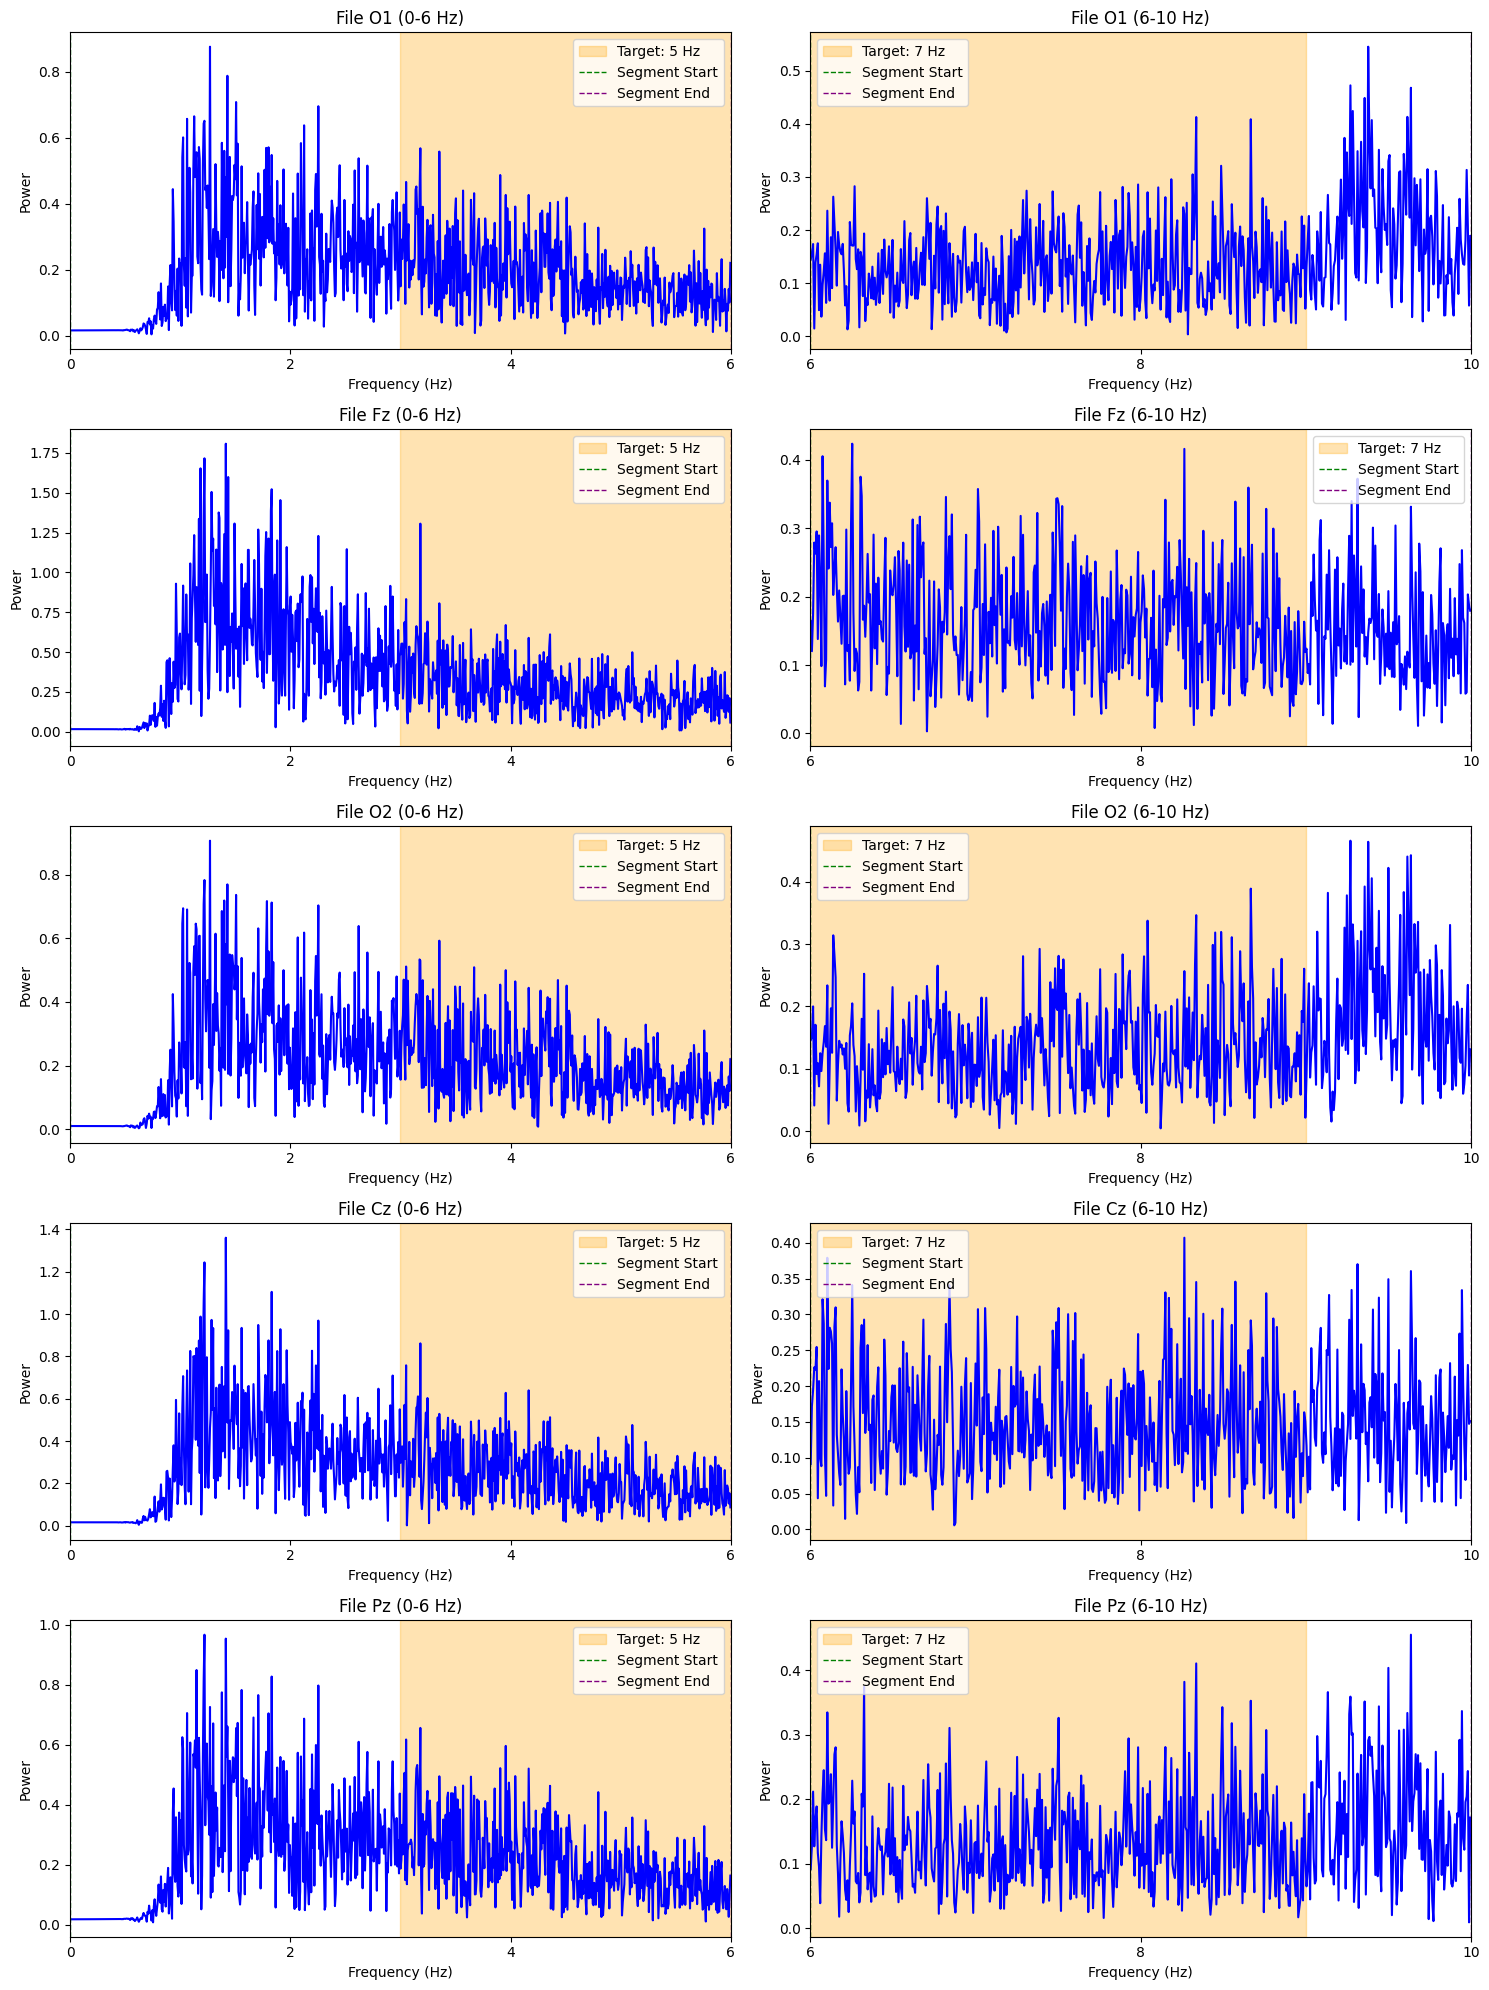

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import mne
import pyxdf
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S004_NoTSSVEp_task-Default_run-001_eeg.xdf'  # Adjust the file path as necessary

# Function to load data from an XDF file
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # Locate the EEG and Marker streams
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # Extract EEG data
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # Extract markers if available
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# Function to create a Bandpass Filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to filter signal with Bandpass Filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Function to create epochs
def create_epochs(df, sampling_rate, markers, channel_names, tmin, tmax):
    if len(markers) == 0:
        raise ValueError("No markers found to create events.")

    # Create events array
    events = np.array([[int(marker[0] * sampling_rate), 0, 1] for marker in markers])

    # Create raw object
    raw = mne.io.RawArray(df.T.values, mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types='eeg'))

    # Create epochs
    epochs = mne.Epochs(raw, events, event_id=1, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True)
    return epochs

# Function to plot Power Spectrum with FFT and target frequencies in segmented ranges with markers
def plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, title_prefix, color='blue', target_freqs=[5, 7], bandwidth=2):
    freq_ranges = [
        (0, 6),   # Low frequencies
        (6, 10)   # High frequencies
    ]

    plt.figure(figsize=(15, 20))

    for i, channel in enumerate(channels):
        if channel in df.columns:
            signal = df[channel].values

            # Filter signal with Bandpass Filter (1-50 Hz)
            filtered_signal = bandpass_filter(signal, 1, 50, sampling_rate)

            # FFT of the filtered signal
            N = len(filtered_signal)
            T = 1.0 / sampling_rate
            yf = fft(filtered_signal)
            xf = np.fft.fftfreq(N, T)[:N // 2]
            power_spectrum = 2.0 / N * np.abs(yf[:N // 2])

            # Create subplots for each frequency range
            for j, (low_freq, high_freq) in enumerate(freq_ranges):
                plt.subplot(len(channels), len(freq_ranges), i * len(freq_ranges) + j + 1)
                mask = (xf >= low_freq) & (xf < high_freq)  # Frequency mask
                plt.plot(xf[mask], power_spectrum[mask], color=color)
                plt.title(f'{title_prefix} {channel} ({low_freq}-{high_freq} Hz)')
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Power')
                plt.xlim(low_freq, high_freq)  # Set frequency range
                plt.xticks(np.arange(low_freq, high_freq + 1, 2))  # Adjust ticks

                # Highlight target frequencies
                for target_freq in target_freqs:
                    if low_freq <= target_freq <= high_freq:
                        plt.axvspan(target_freq - bandwidth, target_freq + bandwidth, color='orange', alpha=0.3, label=f'Target: {target_freq} Hz')

                # Add markers for segment intervals
                plt.axvline(x=low_freq, color='green', linestyle='--', linewidth=1, label='Segment Start')
                plt.axvline(x=high_freq, color='purple', linestyle='--', linewidth=1, label='Segment End')

                # Mark triggers with vertical lines
                if markers:  # Check if markers exist
                    for timestamp, marker in markers:
                        plt.axvline(x=timestamp, color='red', linestyle='--', label=f'Trigger {marker[0]}')
                        plt.legend(loc='upper right')

                plt.legend()
        else:
            print(f'Warning: {channel} not found in data columns.')

    plt.tight_layout()

# Load data from XDF file
df, sampling_rate, markers = load_data(file_path)

# Show markers for verification
print("Markers from File:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# Select channels to plot
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Plot Power Spectrum with segmented frequency ranges and segment markers
plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, 'File', color='blue', target_freqs=[5, 7], bandwidth=2)

# Create epochs
tmin, tmax = -0.5, 1.0  # Time before and after the marker
epochs = create_epochs(df, sampling_rate, markers, channels, tmin, tmax)

# Plot the epochs
epochs.plot(n_epochs=10, events=True)

# Show the plot
plt.show()


In [ ]:
if marker_stream:
    marker_times = marker_stream['time_stamps']
    marker_values = marker_stream['time_series']
    markers = list(zip(marker_times, marker_values))
    print(f"Found {len(markers)} markers.")
else:
    print("No marker stream found.")


NameError: name 'marker_stream' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Markers from File:
Timestamp: 14329.45, Marker: 3
Timestamp: 14359.46, Marker: 13
Timestamp: 14359.46, Marker: 2
Timestamp: 14389.46, Marker: 12
Timestamp: 14389.46, Marker: 3
Timestamp: 14419.47, Marker: 13
Timestamp: 14419.47, Marker: 4
Timestamp: 14449.47, Marker: 14
Timestamp: 14449.47, Marker: 3
Timestamp: 14479.48, Marker: 13
Timestamp: 14479.48, Marker: 1
Available channels: ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'O1', 'Channel 6', 'Channel 7', 'Channel 8', 'Fz', 'Channel 10', 'Channel 11', 'Channel 12', 'Channel 13', 'O2', 'Channel 15', 'Channel 16', 'Channel 17', 'Cz', 'Pz', 'A2', 'Channel 21', 'Channel 22', 'Channel 23', 'Channel 24']


ValueError: len(data) (24) does not match len(info["ch_names"]) (5)

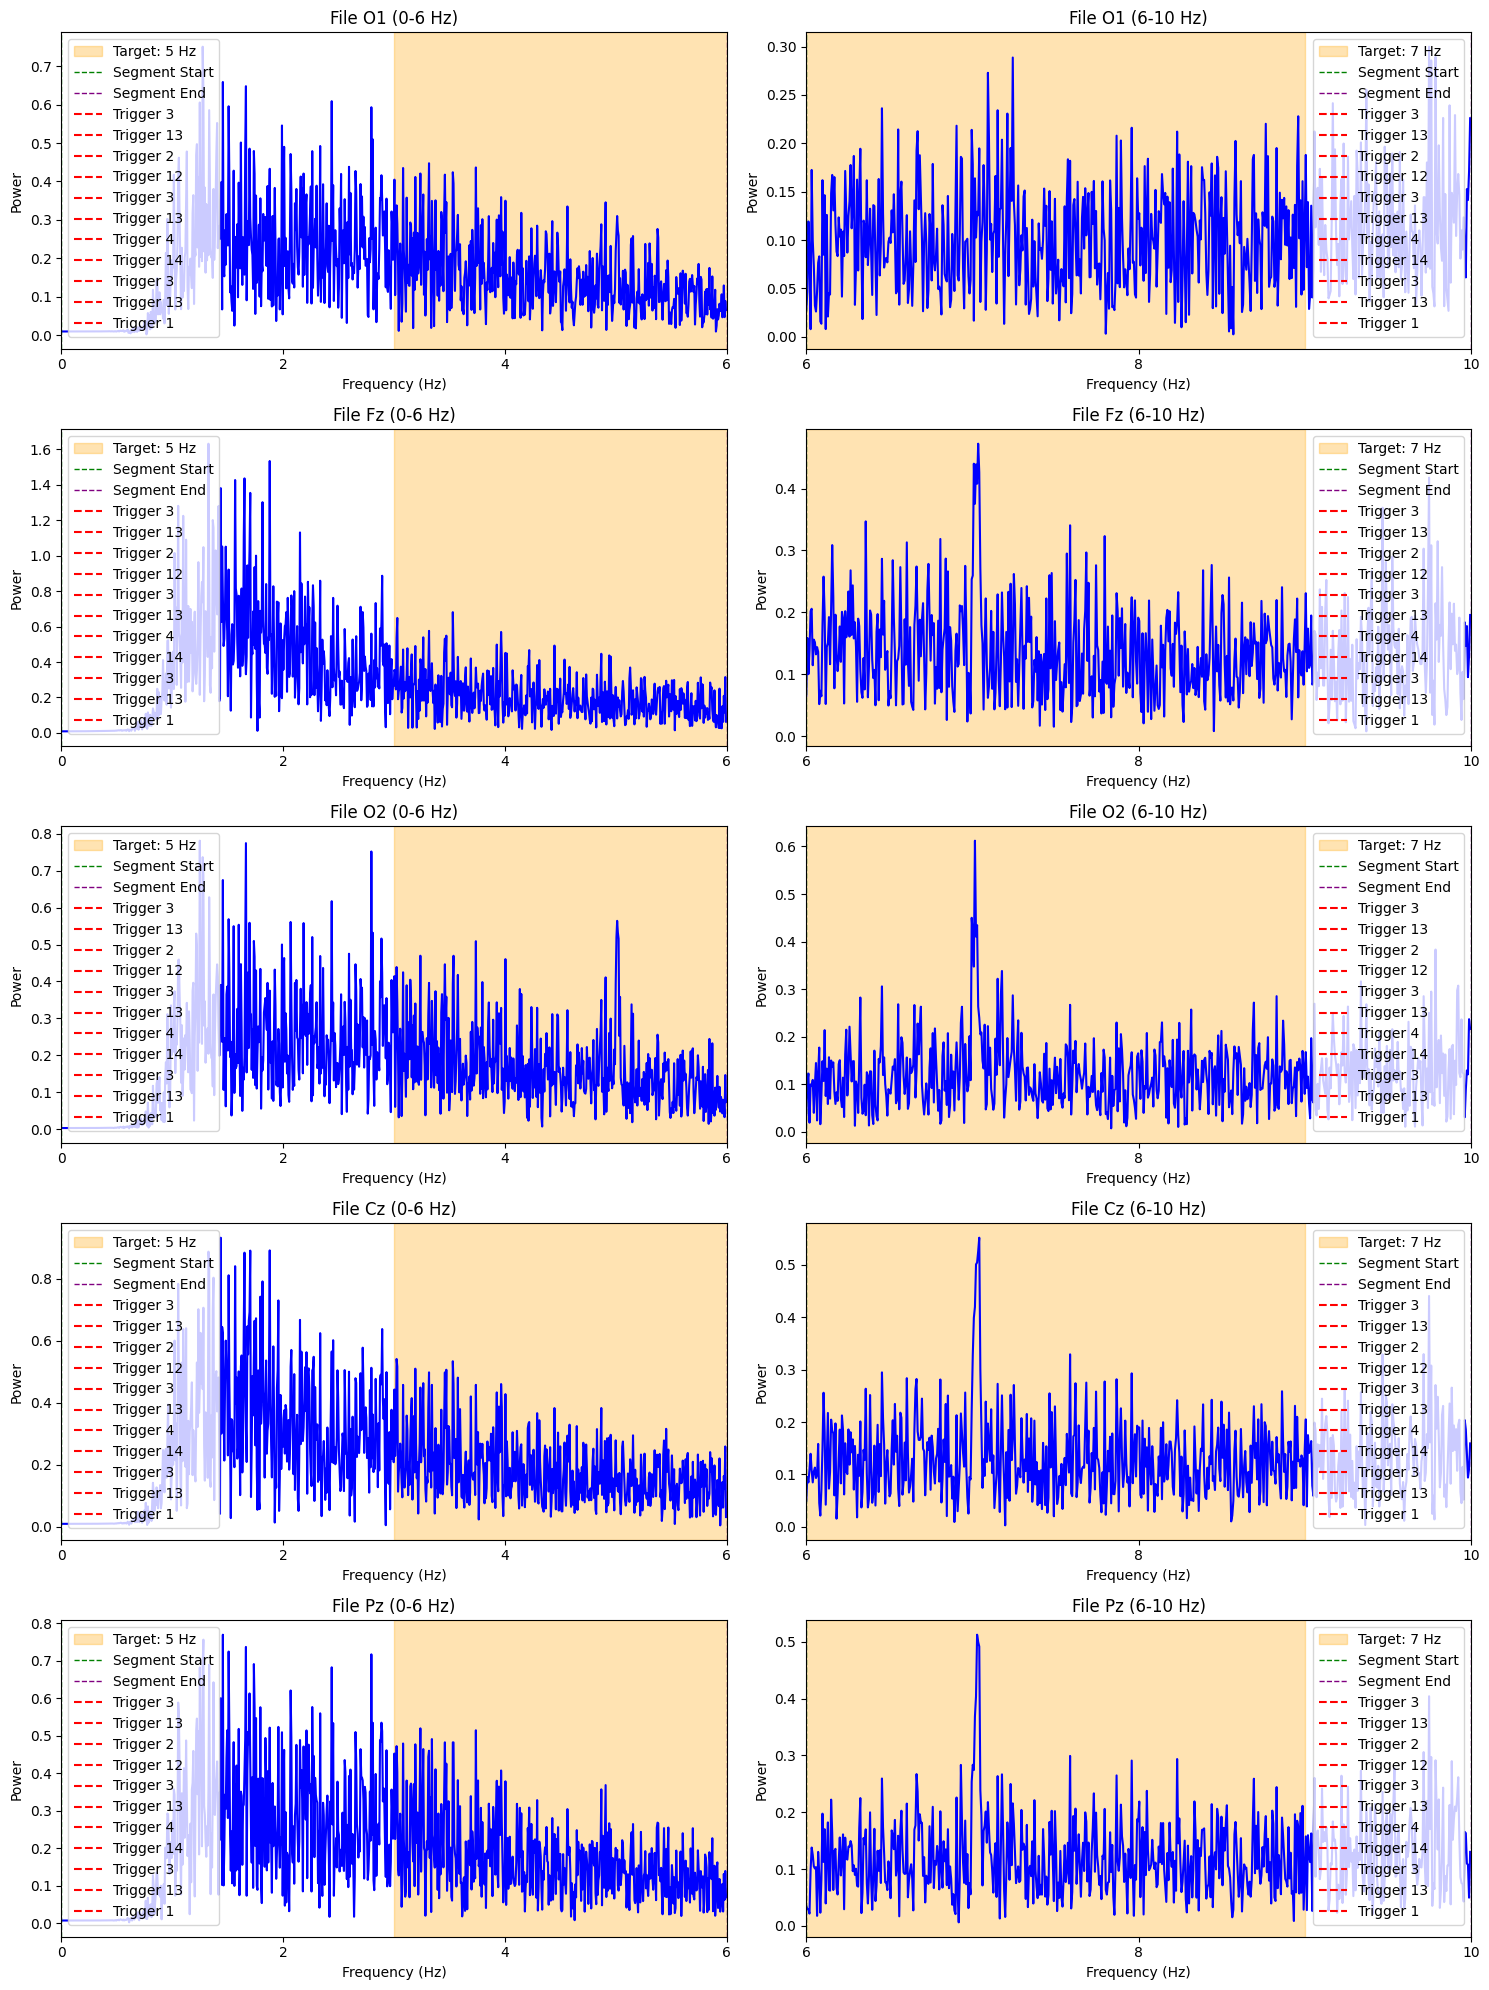

In [ ]:
# Import necessary libraries
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import mne
import pyxdf
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'  # Adjust the file path as necessary

# Function to load data from an XDF file
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # Locate the EEG and Marker streams
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # Extract EEG data
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # Extract markers if available
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# Function to create a Bandpass Filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to filter signal with Bandpass Filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Function to plot Power Spectrum with FFT and target frequencies in segmented ranges with markers
def plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, title_prefix, color='blue', target_freqs=[5, 7], bandwidth=2):
    freq_ranges = [
        (0, 6),   # Low frequencies
        (6, 10)   # High frequencies
    ]

    plt.figure(figsize=(15, 20))

    for i, channel in enumerate(channels):
        if channel in df.columns:
            signal = df[channel].values

            # Filter signal with Bandpass Filter (1-50 Hz)
            filtered_signal = bandpass_filter(signal, 1, 50, sampling_rate)

            # FFT of the filtered signal
            N = len(filtered_signal)
            T = 1.0 / sampling_rate
            yf = fft(filtered_signal)
            xf = np.fft.fftfreq(N, T)[:N // 2]
            power_spectrum = 2.0 / N * np.abs(yf[:N // 2])

            for j, (low_freq, high_freq) in enumerate(freq_ranges):
                plt.subplot(len(channels), len(freq_ranges), i * len(freq_ranges) + j + 1)
                mask = (xf >= low_freq) & (xf < high_freq)  # Frequency mask
                plt.plot(xf[mask], power_spectrum[mask], color=color)
                plt.title(f'{title_prefix} {channel} ({low_freq}-{high_freq} Hz)')
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Power')
                plt.xlim(low_freq, high_freq)  # Set frequency range
                plt.xticks(np.arange(low_freq, high_freq + 1, 2))  # Adjust ticks

                for target_freq in target_freqs:
                    if low_freq <= target_freq <= high_freq:
                        plt.axvspan(target_freq - bandwidth, target_freq + bandwidth, color='orange', alpha=0.3, label=f'Target: {target_freq} Hz')

                plt.axvline(x=low_freq, color='green', linestyle='--', linewidth=1, label='Segment Start')
                plt.axvline(x=high_freq, color='purple', linestyle='--', linewidth=1, label='Segment End')

                if markers:  # Check if markers exist
                    for timestamp, marker in markers:
                        plt.axvline(x=timestamp, color='red', linestyle='--', label=f'Trigger {marker[0]}')
                        plt.legend(loc='upper right')

                plt.legend()
        else:
            print(f'Warning: {channel} not found in data columns.')

    plt.tight_layout()

# Function to create epochs
def create_epochs(df, sampling_rate, markers, channel_names, tmin, tmax):
    if len(markers) == 0:
        raise ValueError("No markers found to create events.")

    # Create events array
    events = np.array([(marker[0], 0, marker[1][0]) for marker in markers])

    # Create Raw object
    info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate)
    raw = mne.io.RawArray(df.values.T, info)

    # Create epochs
    epochs = mne.Epochs(raw, events, tmin=tmin, tmax=tmax, baseline=None, detrend=1, reject_by_annotation=True, event_repeated='merge')
    return epochs

# Load data from XDF file
df, sampling_rate, markers = load_data(file_path)

# Show markers for verification
print("Markers from File:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# Select channels to plot
all_channels = df.columns.tolist()  # Get all available channels from df
print("Available channels:", all_channels)

# Define the channels you want to use
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Filter channels to only use those that are available in the DataFrame
channels = [chan for chan in channels if chan in all_channels]

if not channels:
    raise ValueError("No valid channels found in the data.")

# Plot Power Spectrum with segmented frequency ranges and segment markers
plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, 'File', color='blue', target_freqs=[5, 7], bandwidth=2)

# Create epochs
tmin, tmax = -0.5, 1.0  # Time before and after the marker
epochs = create_epochs(df, sampling_rate, markers, channels, tmin, tmax)

# Show the plot
plt.show()


*เช็ค* **Markers**

In [ ]:
import pyxdf

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'

# Load data from the XDF file
streams, header = pyxdf.load_xdf(file_path)

# Check for marker streams
marker_stream = None
for stream in streams:
    if stream['info']['type'][0] == 'Markers':
        marker_stream = stream
        break

if marker_stream:
    marker_times = marker_stream['time_stamps']
    marker_values = marker_stream['time_series']
    print(f"Found {len(marker_times)} markers.")
    for timestamp, marker in zip(marker_times, marker_values):
        print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")
else:
    print("No marker stream found.")


Found 11 markers.
Timestamp: 14329.45, Marker: 3
Timestamp: 14359.46, Marker: 13
Timestamp: 14359.46, Marker: 2
Timestamp: 14389.46, Marker: 12
Timestamp: 14389.46, Marker: 3
Timestamp: 14419.47, Marker: 13
Timestamp: 14419.47, Marker: 4
Timestamp: 14449.47, Marker: 14
Timestamp: 14449.47, Marker: 3
Timestamp: 14479.48, Marker: 13
Timestamp: 14479.48, Marker: 1


In [ ]:
!pip install pyxdf


In [ ]:
  import pyxdf
  import pandas as pd

  # ฟังก์ชันเพื่อโหลดข้อมูลจากไฟล์ XDF
  def load_data(filepath):
      streams, header = pyxdf.load_xdf(filepath)

      eeg_stream = None
      marker_stream = None
      # ค้นหาสตรีม EEG และ Marker
      for stream in streams:
          if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
              eeg_stream = stream
          elif stream['info']['type'][0] == 'Markers':
              marker_stream = stream

      if eeg_stream is None:
          raise ValueError(f"No stream named 'eeg' found in file {filepath}")

      # สกัดข้อมูล EEG
      data = eeg_stream['time_series']
      sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
      channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
      channel_labels = [chan['label'][0] for chan in channel_names]

      # แปลงเป็น DataFrame
      df = pd.DataFrame(data, columns=channel_labels)

      # สกัด markers ถ้ามี
      markers = []
      if marker_stream:
          marker_times = marker_stream['time_stamps']
          marker_values = marker_stream['time_series']
          markers = list(zip(marker_times, marker_values))

      return df, sampling_rate, markers


In [ ]:
# ขั้นตอนที่ 3: โหลดข้อมูลจากไฟล์ XDF
df, sampling_rate, markers = load_data(file_path)


NameError: name 'load_data' is not defined

In [ ]:
# ติดตั้ง pyxdf (ถ้ายังไม่ได้ติดตั้ง)
!pip install pyxdf

# นำเข้าไลบรารี
import pyxdf
import pandas as pd
from google.colab import drive

# เชื่อมต่อ Google Drive
drive.mount('/content/drive')

# ฟังก์ชันเพื่อโหลดข้อมูลจากไฟล์ XDF
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # ค้นหาสตรีม EEG และ Marker
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # สกัดข้อมูล EEG
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # แปลงเป็น DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # สกัด markers ถ้ามี
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# ขั้นตอนที่ 3: โหลดข้อมูลจากไฟล์ XDF
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'  # ปรับเส้นทางตามความจำเป็น
df, sampling_rate, markers = load_data(file_path)

# ตรวจสอบ DataFrame ที่โหลดมา
print("DataFrame ที่โหลดมา:")
print(df.head())  # แสดง 5 แถวแรกของ DataFrame

# ตรวจสอบ sampling_rate
print(f"Sampling Rate: {sampling_rate}")

# ตรวจสอบ markers
print("Markers ที่โหลดมา:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")


Mounted at /content/drive
DataFrame ที่โหลดมา:
      Channel 1     Channel 2     Channel 3     Channel 4            O1  \
0  80400.906250  80054.007812  80315.710938  79981.742188 -48939.816406   
1  80390.171875  80037.343750  80297.914062  79967.750000 -48941.597656   
2  80389.968750  80036.679688  80296.250000  79966.914062 -48941.632812   
3  80394.187500  80042.109375  80301.632812  79972.148438 -48938.351562   
4  80410.898438  80061.078125  80320.054688  79989.890625 -48933.386719   

      Channel 6     Channel 7     Channel 8            Fz    Channel 10  ...  \
0  80610.515625  80159.992188  80478.867188 -23371.775391  80464.632812  ...   
1  80595.421875  80146.429688  80471.953125 -23372.949219  80449.078125  ...   
2  80595.226562  80146.257812  80473.515625 -23372.681641  80446.890625  ...   
3  80599.257812  80153.945312  80481.179688 -23369.449219  80452.671875  ...   
4  80616.031250  80173.937500  80498.148438 -23367.867188  80472.562500  ...   

     Channel 15    Ch

Mounted at /content/drive
DataFrame ที่โหลดมา:
      Channel 1     Channel 2     Channel 3     Channel 4            O1  \
0  80400.906250  80054.007812  80315.710938  79981.742188 -48939.816406   
1  80390.171875  80037.343750  80297.914062  79967.750000 -48941.597656   
2  80389.968750  80036.679688  80296.250000  79966.914062 -48941.632812   
3  80394.187500  80042.109375  80301.632812  79972.148438 -48938.351562   
4  80410.898438  80061.078125  80320.054688  79989.890625 -48933.386719   

      Channel 6     Channel 7     Channel 8            Fz    Channel 10  ...  \
0  80610.515625  80159.992188  80478.867188 -23371.775391  80464.632812  ...   
1  80595.421875  80146.429688  80471.953125 -23372.949219  80449.078125  ...   
2  80595.226562  80146.257812  80473.515625 -23372.681641  80446.890625  ...   
3  80599.257812  80153.945312  80481.179688 -23369.449219  80452.671875  ...   
4  80616.031250  80173.937500  80498.148438 -23367.867188  80472.562500  ...   

     Channel 15    Ch

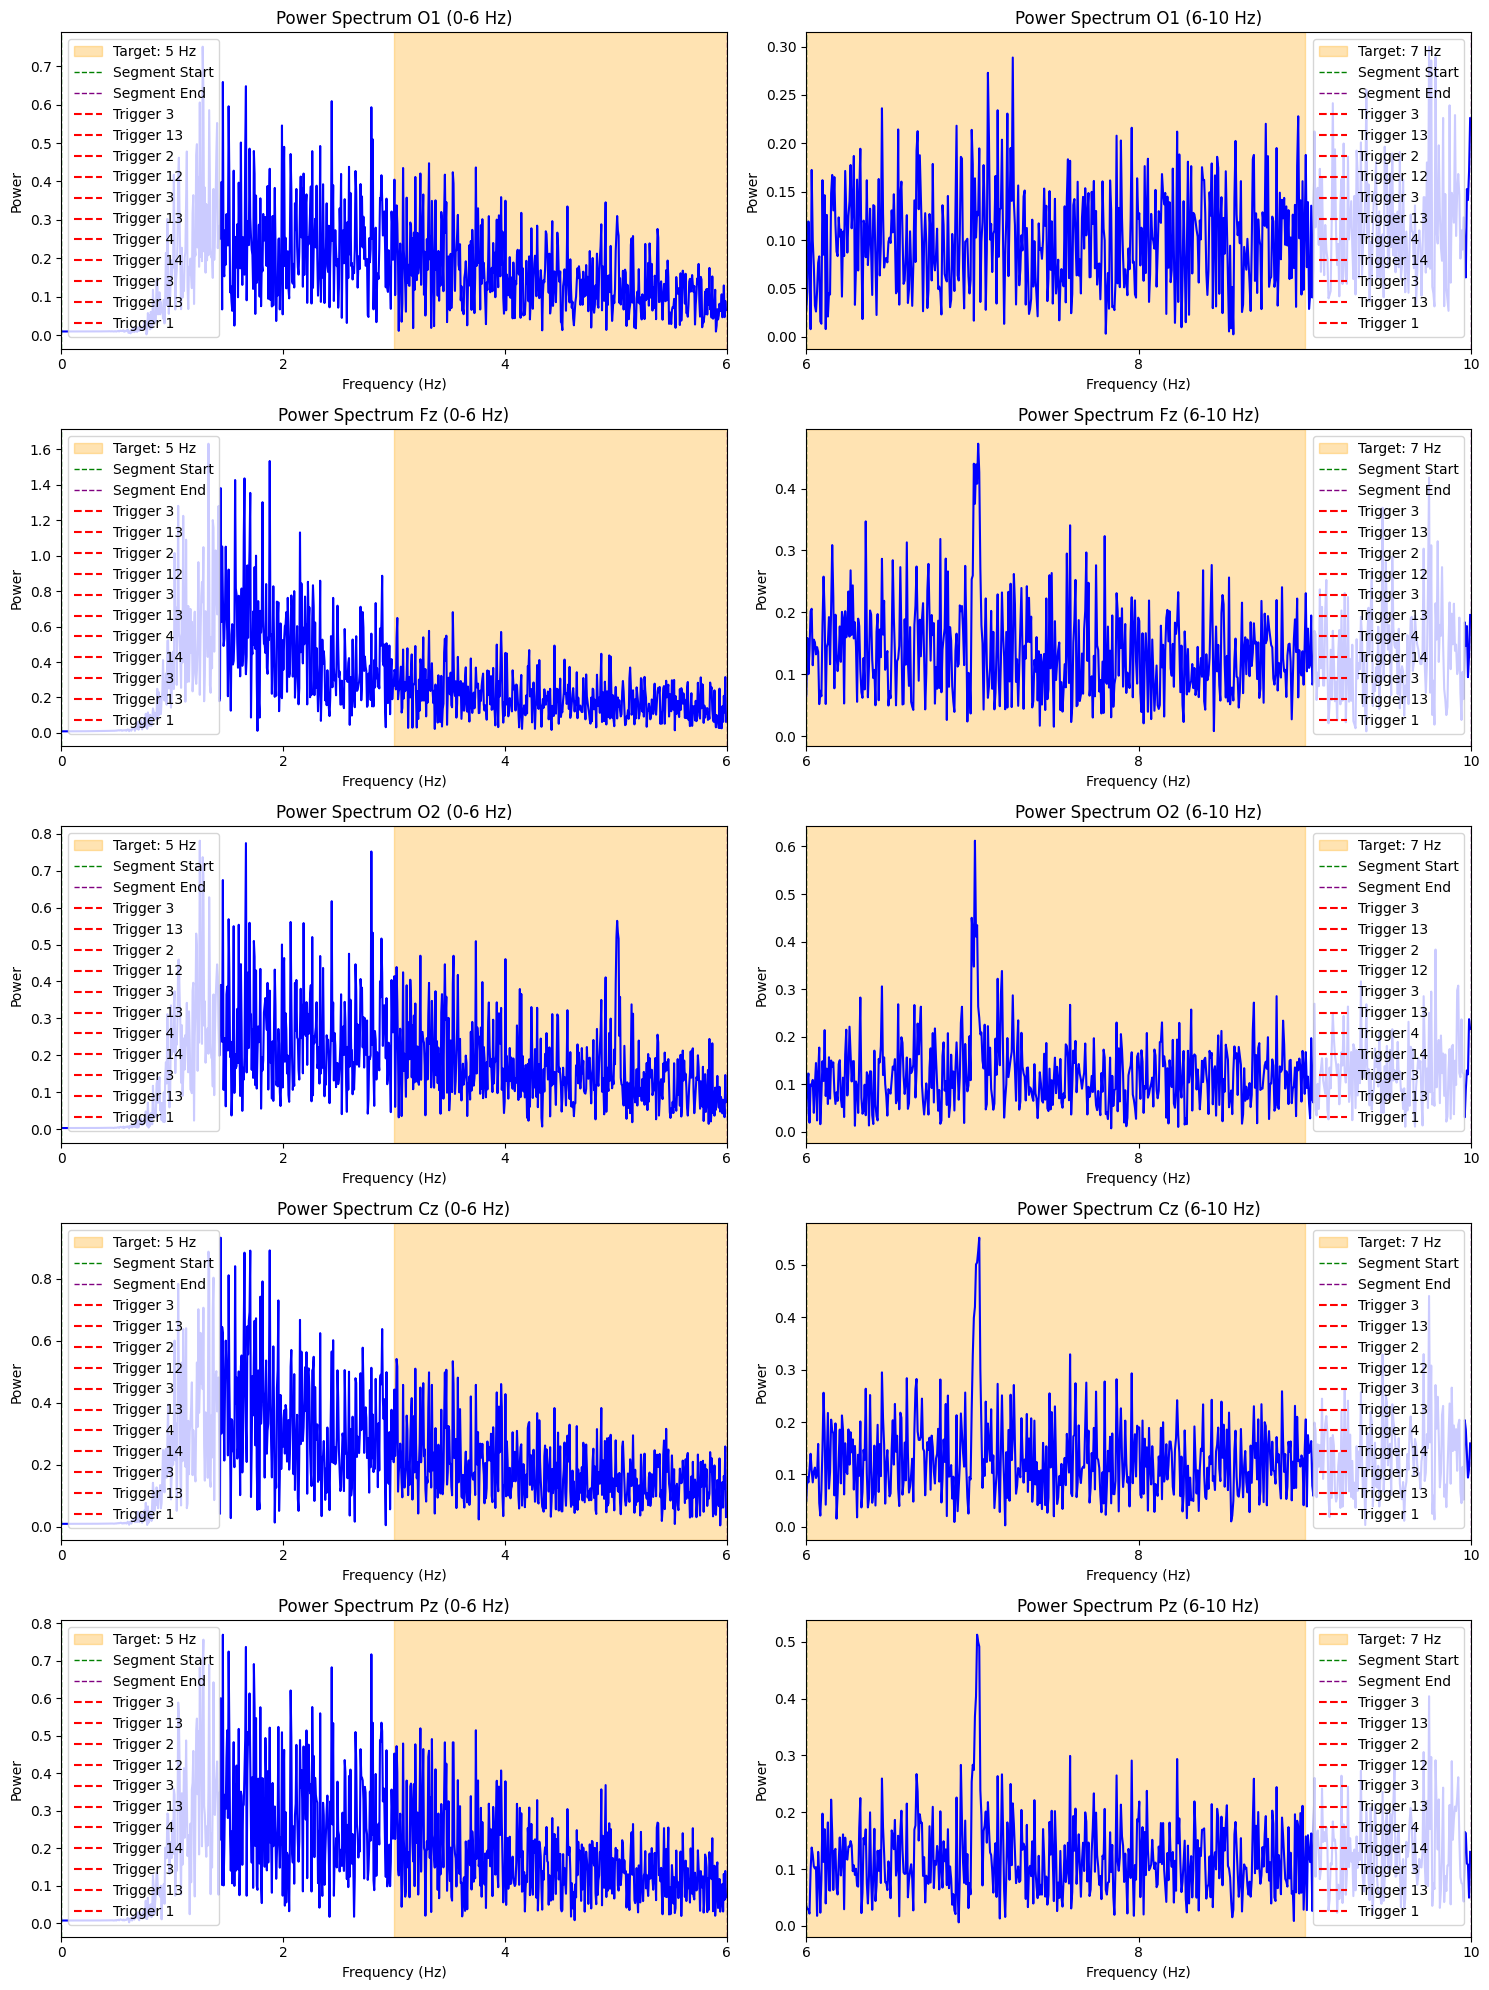

In [2]:
# ติดตั้ง pyxdf (ถ้ายังไม่ได้ติดตั้ง)
!pip install pyxdf

# นำเข้าไลบรารี
import pyxdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.fft import fft
from scipy.signal import butter, filtfilt

# เชื่อมต่อ Google Drive
drive.mount('/content/drive')

# ฟังก์ชันเพื่อโหลดข้อมูลจากไฟล์ XDF
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # ค้นหาสตรีม EEG และ Marker
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # สกัดข้อมูล EEG
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # แปลงเป็น DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # สกัด markers ถ้ามี
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# ฟังก์ชันเพื่อสร้าง Bandpass Filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# ฟังก์ชันเพื่อกรองสัญญาณด้วย Bandpass Filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# ขั้นตอนที่ 3: โหลดข้อมูลจากไฟล์ XDF
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'  # ปรับเส้นทางตามความจำเป็น
df, sampling_rate, markers = load_data(file_path)

# ตรวจสอบ DataFrame ที่โหลดมา
print("DataFrame ที่โหลดมา:")
print(df.head())  # แสดง 5 แถวแรกของ DataFrame

# ตรวจสอบ sampling_rate
print(f"Sampling Rate: {sampling_rate}")

# ตรวจสอบ markers
print("Markers ที่โหลดมา:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# ฟังก์ชันที่ใช้สำหรับการวาดกราฟ
def plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, title_prefix, color='blue', target_freqs=[5, 7], bandwidth=2):
    freq_ranges = [
        (0, 6),   # Low frequencies
        (6, 10)   # High frequencies
    ]

    plt.figure(figsize=(15, 20))

    for i, channel in enumerate(channels):
        if channel in df.columns:
            signal = df[channel].values

            # Filter signal with Bandpass Filter (1-50 Hz)
            filtered_signal = bandpass_filter(signal, 1, 50, sampling_rate)

            # FFT of the filtered signal
            N = len(filtered_signal)
            T = 1.0 / sampling_rate
            yf = fft(filtered_signal)
            xf = np.fft.fftfreq(N, T)[:N // 2]
            power_spectrum = 2.0 / N * np.abs(yf[:N // 2])

            for j, (low_freq, high_freq) in enumerate(freq_ranges):
                plt.subplot(len(channels), len(freq_ranges), i * len(freq_ranges) + j + 1)
                mask = (xf >= low_freq) & (xf < high_freq)  # Frequency mask
                plt.plot(xf[mask], power_spectrum[mask], color=color)
                plt.title(f'{title_prefix} {channel} ({low_freq}-{high_freq} Hz)')
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Power')
                plt.xlim(low_freq, high_freq)  # Set frequency range
                plt.xticks(np.arange(low_freq, high_freq + 1, 2))  # Adjust ticks

                for target_freq in target_freqs:
                    if low_freq <= target_freq <= high_freq:
                        plt.axvspan(target_freq - bandwidth, target_freq + bandwidth, color='orange', alpha=0.3, label=f'Target: {target_freq} Hz')

                plt.axvline(x=low_freq, color='green', linestyle='--', linewidth=1, label='Segment Start')
                plt.axvline(x=high_freq, color='purple', linestyle='--', linewidth=1, label='Segment End')

                if markers:  # Check if markers exist
                    for timestamp, marker in markers:
                        plt.axvline(x=timestamp, color='red', linestyle='--', label=f'Trigger {marker[0]}')
                        plt.legend(loc='upper right')

                plt.legend()
        else:
            print(f'Warning: {channel} not found in data columns.')

    plt.tight_layout()
    plt.show()

# เลือกช่องที่ต้องการวิเคราะห์
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']  # ปรับช่องตามที่มีอยู่ใน df

# เรียกใช้ฟังก์ชัน plot_power_spectrum_segmented_with_markers
plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, 'Power Spectrum', color='blue', target_freqs=[5, 7], bandwidth=2)


In [ ]:
# ฟังก์ชันที่ใช้สำหรับการวาดกราฟ
def plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, title_prefix, color='blue', target_freqs=[5, 7], bandwidth=2, marker_start=None, marker_end=None):
    freq_ranges = [
        (0, 6),   # Low frequencies
        (6, 10)   # High frequencies
    ]

    plt.figure(figsize=(15, 20))

    for i, channel in enumerate(channels):
        if channel in df.columns:
            # ตรวจสอบว่า marker_start และ marker_end ถูกเลือก
            if marker_start is not None and marker_end is not None:
                start_time = marker_start[0]
                end_time = marker_end[0]

                # กรองสัญญาณตามช่วงเวลาที่เลือก
                mask = (df.index / sampling_rate >= start_time) & (df.index / sampling_rate <= end_time)
                signal = df[channel].values[mask]
            else:
                signal = df[channel].values

            # Filter signal with Bandpass Filter (1-50 Hz)
            filtered_signal = bandpass_filter(signal, 1, 50, sampling_rate)

            # FFT of the filtered signal
            N = len(filtered_signal)
            T = 1.0 / sampling_rate
            yf = fft(filtered_signal)
            xf = np.fft.fftfreq(N, T)[:N // 2]
            power_spectrum = 2.0 / N * np.abs(yf[:N // 2])

            for j, (low_freq, high_freq) in enumerate(freq_ranges):
                plt.subplot(len(channels), len(freq_ranges), i * len(freq_ranges) + j + 1)
                mask = (xf >= low_freq) & (xf < high_freq)  # Frequency mask
                plt.plot(xf[mask], power_spectrum[mask], color=color)
                plt.title(f'{title_prefix} {channel} ({low_freq}-{high_freq} Hz)')
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Power')
                plt.xlim(low_freq, high_freq)  # Set frequency range
                plt.xticks(np.arange(low_freq, high_freq + 1, 2))  # Adjust ticks

                for target_freq in target_freqs:
                    if low_freq <= target_freq <= high_freq:
                        plt.axvspan(target_freq - bandwidth, target_freq + bandwidth, color='orange', alpha=0.3, label=f'Target: {target_freq} Hz')

                plt.axvline(x=low_freq, color='green', linestyle='--', linewidth=1, label='Segment Start')
                plt.axvline(x=high_freq, color='purple', linestyle='--', linewidth=1, label='Segment End')

                # แสดง markers ที่เลือก
                if markers:  # Check if markers exist
                    for timestamp, marker in markers:
                        if (marker_start is None or timestamp >= marker_start[0]) and (marker_end is None or timestamp <= marker_end[0]):
                            plt.axvline(x=timestamp, color='red', linestyle='--', label=f'Trigger {marker[0]}')
                            plt.legend(loc='upper right')

                plt.legend()
        else:
            print(f'Warning: {channel} not found in data columns.')

    plt.tight_layout()
    plt.show()

# เลือกช่องที่ต้องการวิเคราะห์
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']  # ปรับช่องตามที่มีอยู่ใน df

# แสดง markers ให้เลือก
print("Markers ที่โหลดมา:")
for i, (timestamp, marker) in enumerate(markers):
    print(f"{i + 1}: Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# เลือก marker สำหรับช่วงเริ่มต้นและสิ้นสุด
marker_start_index = int(input("เลือกหมายเลขของ Marker เริ่มต้น: ")) - 1
marker_end_index = int(input("เลือกหมายเลขของ Marker สิ้นสุด: ")) - 1

marker_start = markers[marker_start_index]
marker_end = markers[marker_end_index]

# เรียกใช้ฟังก์ชัน plot_power_spectrum_segmented_with_markers
plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, 'Power Spectrum', color='blue', target_freqs=[5, 7], bandwidth=2, marker_start=marker_start, marker_end=marker_end)


Markers ที่โหลดมา:
1: Timestamp: 14329.45, Marker: 3
2: Timestamp: 14359.46, Marker: 13
3: Timestamp: 14359.46, Marker: 2
4: Timestamp: 14389.46, Marker: 12
5: Timestamp: 14389.46, Marker: 3
6: Timestamp: 14419.47, Marker: 13
7: Timestamp: 14419.47, Marker: 4
8: Timestamp: 14449.47, Marker: 14
9: Timestamp: 14449.47, Marker: 3
10: Timestamp: 14479.48, Marker: 13
11: Timestamp: 14479.48, Marker: 1
เลือกหมายเลขของ Marker เริ่มต้น: 4
เลือกหมายเลขของ Marker สิ้นสุด: 14


IndexError: list index out of range

In [ ]:
# ฟังก์ชันที่ใช้สำหรับการวาดกราฟ
def plot_power_spectrum_segmented_with_markers(df, sampling_rate, markers, channels, title_prefix, color='blue', target_freqs=[5, 7], bandwidth=2, marker_start=None, marker_end=None):
    freq_ranges = [
        (0, 6),   # Low frequencies
        (6, 10)   # High frequencies
    ]

    plt.figure(figsize=(15, 20))

    for i, channel in enumerate(channels):
        if channel in df.columns:
            signal = df[channel].values

            # หากมีการกำหนด marker_start และ marker_end ให้เลือกช่วงข้อมูลที่ต้องการ
            if marker_start and marker_end:
                start_time = marker_start[0]
                end_time = marker_end[0]
                start_index = int(start_time * sampling_rate)
                end_index = int(end_time * sampling_rate)

                # ตรวจสอบความยาวของสัญญาณ
                if end_index - start_index <= 0 or end_index > len(signal):
                    print(f'Warning: ช่วงเวลาที่เลือก ({start_time} - {end_time}) ไม่ถูกต้องหรือไม่มีข้อมูลในช่อง {channel}.')
                    continue

                signal = signal[start_index:end_index]

            # Filter signal with Bandpass Filter (1-50 Hz)
            filtered_signal = bandpass_filter(signal, 1, 50, sampling_rate)

            # FFT of the filtered signal
            N = len(filtered_signal)
            if N == 0:
                continue  # หากสัญญาณกรองไม่มีข้อมูล ให้ข้ามการวิเคราะห์

            T = 1.0 / sampling_rate
            yf = fft(filtered_signal)
            xf = np.fft.fftfreq(N, T)[:N // 2]
            power_spectrum = 2.0 / N * np.abs(yf[:N // 2])

            for j, (low_freq, high_freq) in enumerate(freq_ranges):
                plt.subplot(len(channels), len(freq_ranges), i * len(freq_ranges) + j + 1)
                mask = (xf >= low_freq) & (xf < high_freq)  # Frequency mask
                plt.plot(xf[mask], power_spectrum[mask], color=color)
                plt.title(f'{title_prefix} {channel} ({low_freq}-{high_freq} Hz)')
                plt.xlabel('Frequency (Hz)')
                plt.ylabel('Power')
                plt.xlim(low_freq, high_freq)  # Set frequency range
                plt.xticks(np.arange(low_freq, high_freq + 1, 2))  # Adjust ticks

                for target_freq in target_freqs:
                    if low_freq <= target_freq <= high_freq:
                        plt.axvspan(target_freq - bandwidth, target_freq + bandwidth, color='orange', alpha=0.3, label=f'Target: {target_freq} Hz')

                plt.axvline(x=low_freq, color='green', linestyle='--', linewidth=1, label='Segment Start')
                plt.axvline(x=high_freq, color='purple', linestyle='--', linewidth=1, label='Segment End')

                if markers:  # Check if markers exist
                    for timestamp, marker in markers:
                        plt.axvline(x=timestamp, color='red', linestyle='--', label=f'Trigger {marker[0]}')
                        plt.legend(loc='upper right')

                plt.legend()
        else:
            print(f'Warning: {channel} not found in data columns.')

    plt.tight_layout()
    plt.show()


In [ ]:
# Install necessary libraries
!pip install pyxdf
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.8 MB/s eta 0:00:00


In [ ]:
# Install necessary libraries
# !pip install pyxdf
# !pip install mne

# Import necessary libraries
import numpy as np
import pandas as pd
import mne
import pyxdf
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'  # Adjust the file path as necessary

# Function to load data from an XDF file
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # Locate the EEG and Marker streams
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # Extract EEG data
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # Extract markers if available
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# Function to create epochs from markers
def create_epochs(data, markers, sampling_rate, epoch_duration=1):
    events = []
    for timestamp, marker in markers:
        try:
            event_value = int(marker[0])  # Check if marker can be converted to integer
            events.append([int(timestamp * sampling_rate), 0, event_value])
        except ValueError as e:
            print(f"Error converting marker {marker} at timestamp {timestamp}: {e}")

    events = np.array(events)

    if len(events) == 0:
        raise ValueError("No valid events were created from markers.")

    # Create MNE Raw object
    info = mne.create_info(ch_names=data.columns.tolist(), sfreq=sampling_rate, ch_types='eeg')
    raw = mne.io.RawArray(data.T, info)

    # Create epochs with event_repeated='merge' to handle repeated events
    try:
        epochs = mne.Epochs(raw, events, event_id=None, tmin=0, tmax=epoch_duration, baseline=None, detrend=None, reject_by_annotation=False, preload=True, event_repeated='merge')
    except ValueError as e:
        print(f"Error creating epochs: {e}")
        return None

    return epochs

# Function to plot Power Spectrum with FFT
def plot_power_spectrum(epochs, channels, title_prefix):
    plt.figure(figsize=(15, 10))

    for i, channel in enumerate(channels):
        if channel in epochs.ch_names:
            data = epochs.get_data(picks=channel)
            power_spectrum = np.mean(np.abs(fft(data, axis=2))**2, axis=0)  # Average power spectrum across epochs
            freqs = np.fft.fftfreq(data.shape[2], d=1/epochs.info['sfreq'])

            plt.subplot(len(channels), 1, i + 1)
            plt.plot(freqs[:len(freqs)//2], power_spectrum[0][:len(freqs)//2])  # Plot only positive frequencies
            plt.title(f'{title_prefix} - {channel}')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Power')
            plt.xlim(0, 50)  # Set frequency range
            plt.xticks(np.arange(0, 51, 5))  # Adjust ticks
        else:
            print(f'Warning: {channel} not found in data channels.')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust spacing for title
    plt.show()

# Load data from XDF file
df, sampling_rate, markers = load_data(file_path)

# Show markers for verification
print("Markers from File:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# Create epochs from markers
epochs = create_epochs(df, markers, sampling_rate, epoch_duration=0.5)  # 0.5 วินาที epochs

if epochs is None:
    print("Error: Epochs creation failed.")
else:
    print(f"Number of epochs created: {len(epochs)}")
    print(f"Channels in epochs: {epochs.ch_names}")

# Select channels to plot
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Plot Power Spectrum
if epochs is not None and len(epochs) > 0:
    plot_power_spectrum(epochs, channels, 'EEG Power Spectrum')
else:
    print("Error: No epochs available for analysis.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Markers from File:
Timestamp: 14329.45, Marker: 3
Timestamp: 14359.46, Marker: 13
Timestamp: 14359.46, Marker: 2
Timestamp: 14389.46, Marker: 12
Timestamp: 14389.46, Marker: 3
Timestamp: 14419.47, Marker: 13
Timestamp: 14419.47, Marker: 4
Timestamp: 14449.47, Marker: 14
Timestamp: 14449.47, Marker: 3
Timestamp: 14479.48, Marker: 13
Timestamp: 14479.48, Marker: 1
Creating RawArray with float64 data, n_channels=24, n_times=39372
    Range : 0 ... 39371 =      0.000 ...   153.793 secs
Ready.
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6 events and 129 original time points ...
6 bad epochs dropped
Number of epochs created: 0
Channels in epochs: ['Channel 1', 'Cha

<ipython-input-30-f3c93800b666>:76: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=None, tmin=0, tmax=epoch_duration, baseline=None, detrend=None, reject_by_annotation=False, preload=True, event_repeated='merge')


In [ ]:
# Function to create epochs from markers
def create_epochs(data, markers, sampling_rate, epoch_duration=1):
    events = []
    for timestamp, marker in markers:
        try:
            event_value = int(marker[0])  # Check if marker can be converted to integer
            events.append([int(timestamp * sampling_rate), 0, event_value])
        except ValueError as e:
            print(f"Error converting marker {marker} at timestamp {timestamp}: {e}")

    events = np.array(events)

    if len(events) == 0:
        raise ValueError("No valid events were created from markers.")

    # Create MNE Raw object
    info = mne.create_info(ch_names=data.columns.tolist(), sfreq=sampling_rate, ch_types='eeg')
    raw = mne.io.RawArray(data.T, info)

    # Create epochs without rejecting any
    try:
        epochs = mne.Epochs(
            raw,
            events,
            event_id=None,
            tmin=0,
            tmax=epoch_duration,
            baseline=None,
            detrend=None,
            reject=None,  # Set reject to None to avoid dropping epochs
            preload=True,
            event_repeated='merge'
        )
    except ValueError as e:
        print(f"Error creating epochs: {e}")
        return None

    return epochs


In [ ]:
# Install necessary libraries
# !pip install pyxdf
# !pip install mne

# Import necessary libraries
import numpy as np
import pandas as pd
import mne
import pyxdf
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt
from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'  # Adjust as needed


# Check if the file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Function to load data from an XDF file
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # Locate the EEG and Marker streams
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # Extract EEG data
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # Extract markers if available
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# Function to create a Bandpass Filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to filter signal with Bandpass Filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Create epochs from markers
def create_epochs(data, markers, sampling_rate, epoch_duration=1):
    events = []
    for timestamp, marker in markers:
        try:
            event_value = int(marker[0])  # Check if marker can be converted to integer
            events.append([int(timestamp * sampling_rate), 0, event_value])
        except ValueError as e:
            print(f"Error converting marker {marker} at timestamp {timestamp}: {e}")

    events = np.array(events)

    if len(events) == 0:
        raise ValueError("No valid events were created from markers.")

    # Create MNE Raw object
    info = mne.create_info(ch_names=data.columns.tolist(), sfreq=sampling_rate, ch_types='eeg')
    raw = mne.io.RawArray(data.T, info)

    # Create epochs with preload=True
    try:
        epochs = mne.Epochs(raw, events, event_id=None, tmin=0, tmax=epoch_duration, baseline=None, detrend=None, reject_by_annotation=False, event_repeated='drop', preload=True)
    except ValueError as e:
        print(f"Error creating epochs: {e}")
        return None

    return epochs

# Function to plot Power Spectrum with FFT
def plot_power_spectrum(epochs, channels, title_prefix):
    plt.figure(figsize=(15, 10))

    for i, channel in enumerate(channels):
        if channel in epochs.ch_names:
            data = epochs.get_data(picks=channel)
            power_spectrum = np.mean(np.abs(fft(data, axis=2))**2, axis=0)  # Average power spectrum across epochs
            freqs = np.fft.fftfreq(data.shape[2], d=1/epochs.info['sfreq'])

            plt.subplot(len(channels), 1, i + 1)
            plt.plot(freqs[:len(freqs)//2], power_spectrum[0][:len(freqs)//2])  # Plot only positive frequencies
            plt.title(f'{title_prefix} - {channel}')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Power')
            plt.xlim(0, 50)  # Set frequency range
            plt.xticks(np.arange(0, 51, 5))  # Adjust ticks
        else:
            print(f'Warning: {channel} not found in data channels.')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust spacing for title
    plt.show()

# Load data from XDF file
df, sampling_rate, markers = load_data(file_path)

# Show markers for verification
print("Markers from File:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# Create epochs from markers
epochs = create_epochs(df, markers, sampling_rate, epoch_duration=0.5)  # 0.5 seconds epochs

if epochs is None:
    print("Error: Epochs creation failed.")
else:
    print(f"Number of epochs created: {len(epochs)}")
    print(f"Channels in epochs: {epochs.ch_names}")

# Select channels to plot
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Plot Power Spectrum
if epochs is not None and len(epochs) > 0:
    plot_power_spectrum(epochs, channels, 'EEG Power Spectrum')
else:
    print("Error: No epochs available for analysis.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Markers from File:
Timestamp: 14329.45, Marker: 3
Timestamp: 14359.46, Marker: 13
Timestamp: 14359.46, Marker: 2
Timestamp: 14389.46, Marker: 12
Timestamp: 14389.46, Marker: 3
Timestamp: 14419.47, Marker: 13
Timestamp: 14419.47, Marker: 4
Timestamp: 14449.47, Marker: 14
Timestamp: 14449.47, Marker: 3
Timestamp: 14479.48, Marker: 13
Timestamp: 14479.48, Marker: 1
Creating RawArray with float64 data, n_channels=24, n_times=39372
    Range : 0 ... 39371 =      0.000 ...   153.793 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6 events and 129 original time points ...
6 bad epochs dropped
Number of epochs created: 0
Channels in epochs: ['Channel 1', 'Channe

<ipython-input-53-bb248e278fc2>:96: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(raw, events, event_id=None, tmin=0, tmax=epoch_duration, baseline=None, detrend=None, reject_by_annotation=False, event_repeated='drop', preload=True)


In [ ]:
print("Data summary:")
print(df.describe())


Data summary:
          Channel 1     Channel 2     Channel 3     Channel 4            O1  \
count  39372.000000  39372.000000  39372.000000  39372.000000  39372.000000   
mean   80345.921875  79996.890625  80257.140625  79925.742188 -49040.058594   
std      111.653786    111.950630    111.308151    111.685814     90.883041   
min    79942.539062  79590.609375  79854.359375  79522.289062 -49241.824219   
25%    80258.210938  79909.326172  80170.130859  79838.585938 -49097.972656   
50%    80362.765625  80013.769531  80274.125000  79942.515625 -49051.076172   
75%    80432.917969  80083.851562  80343.728516  80012.398438 -48957.726562   
max    80694.679688  80344.000000  80597.476562  80273.539062 -48857.917969   

          Channel 6     Channel 7     Channel 8            Fz    Channel 10  \
count  39372.000000  39372.000000  39372.000000  39372.000000  39372.000000   
mean   80552.593750  80105.046875  80430.007812 -23565.814453  80408.687500   
std      112.831131    111.817696    

In [1]:
reject = {'eeg': 150e-6}  # Adjust threshold as needed
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=epoch_duration, baseline=None, detrend=None, reject=reject, preload=True)


NameError: name 'mne' is not defined

# **03 Oct**

In [7]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.6 MB/s eta 0:00:00


In [14]:
# Load necessary libraries
import numpy as np
import pandas as pd
import mne
import pyxdf
import matplotlib.pyplot as plt
from scipy.fft import fft
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'  # Adjust the file path as necessary

# Function to load data from an XDF file
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    # Locate the EEG and Marker streams
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    # Extract EEG data
    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=channel_labels)

    # Extract markers if available
    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# Function to create epochs from markers with start and end parameters
def create_epochs(data, markers, sampling_rate, start_time=0, end_time=1):
    events = []
    for timestamp, marker in markers:
        try:
            event_value = int(marker[0])  # Check if marker can be converted to integer
            event_time = int(timestamp * sampling_rate)
            # Check for duplicate event times
            if any(event_time == e[0] for e in events):
                continue  # Skip if event time already exists
            events.append([event_time, 0, event_value])
        except ValueError as e:
            print(f"Error converting marker {marker} at timestamp {timestamp}: {e}")

    events = np.array(events)

    if len(events) == 0:
        raise ValueError("No valid events were created from markers.")

    # Create MNE Raw object
    info = mne.create_info(ch_names=data.columns.tolist(), sfreq=sampling_rate, ch_types='eeg')
    raw = mne.io.RawArray(data.T, info)

    # Create epochs with preload=True and merge repeated events
    try:
        epochs = mne.Epochs(
            raw,
            events,
            event_id=None,
            tmin=start_time,
            tmax=end_time,
            baseline=None,
            detrend=None,
            reject=None,  # No rejection criteria
            reject_by_annotation=True,  # Use rejection by annotation
            event_repeated='merge',  # Merge repeated events
            preload=True
        )
    except ValueError as e:
        print(f"Error creating epochs: {e}")
        return None

    return epochs  # Return created epochs

# Function to plot Power Spectrum with FFT
def plot_power_spectrum(epochs, channels, title_prefix):
    plt.figure(figsize=(15, 10))

    for i, channel in enumerate(channels):
        if channel in epochs.ch_names:
            data = epochs.get_data(picks=channel)
            power_spectrum = np.mean(np.abs(fft(data, axis=2))**2, axis=0)  # Average power spectrum across epochs
            freqs = np.fft.fftfreq(data.shape[2], d=1/epochs.info['sfreq'])

            plt.subplot(len(channels), 1, i + 1)
            plt.plot(freqs[:len(freqs)//2], power_spectrum[0][:len(freqs)//2])  # Plot only positive frequencies
            plt.title(f'{title_prefix} - {channel}')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Power')
            plt.xlim(0, 50)  # Set frequency range
            plt.xticks(np.arange(0, 51, 5))  # Adjust ticks
        else:
            print(f'Warning: {channel} not found in data channels.')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust spacing for title
    plt.show()

# Load data from XDF file
df, sampling_rate, markers = load_data(file_path)

# Show markers for verification
print("Markers from File:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# Define the time window for epochs (in seconds)
start_time = 0  # Start of epoch
end_time = 0.5  # End of epoch

# Create epochs from markers
epochs = create_epochs(df, markers, sampling_rate, start_time, end_time)

if epochs is None:
    print("Error: Epochs creation failed.")
else:
    print(f"Number of epochs created: {len(epochs)}")
    print(f"Channels in epochs: {epochs.ch_names}")

# Select channels to plot
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Plot Power Spectrum
if epochs is not None and len(epochs) > 0:
    plot_power_spectrum(epochs, channels, 'EEG Power Spectrum')
else:
    print("Error: No epochs available for analysis.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Markers from File:
Timestamp: 14329.45, Marker: 3
Timestamp: 14359.46, Marker: 13
Timestamp: 14359.46, Marker: 2
Timestamp: 14389.46, Marker: 12
Timestamp: 14389.46, Marker: 3
Timestamp: 14419.47, Marker: 13
Timestamp: 14419.47, Marker: 4
Timestamp: 14449.47, Marker: 14
Timestamp: 14449.47, Marker: 3
Timestamp: 14479.48, Marker: 13
Timestamp: 14479.48, Marker: 1
Creating RawArray with float64 data, n_channels=24, n_times=39372
    Range : 0 ... 39371 =      0.000 ...   153.793 secs
Ready.
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6 events and 129 original time points ...
6 bad epochs dropped
Number of epochs created: 0
Channels in epochs: ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'O1', 'Channel 6', 'Channel 7', 'Channel 8', 'Fz', 'Channel 10', 'Channel 

<ipython-input-14-e052b8b8d371>:75: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(


In [16]:
epochs = mne.Epochs(
    raw,
    events,
    event_id=None,
    tmin=start_time,
    tmax=end_time,
    baseline=None,
    detrend=None,
    reject=dict(eeg=100e-6),  # Set rejection criteria for EEG (modify threshold as needed)
    reject_by_annotation=True,
    event_repeated='merge',
    preload=True
)


NameError: name 'raw' is not defined

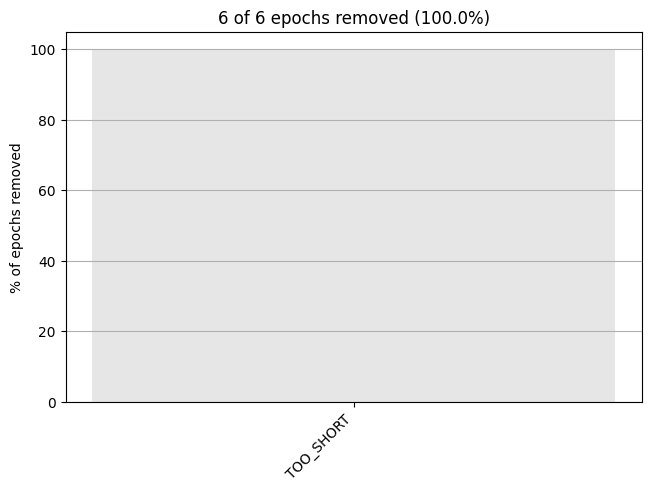

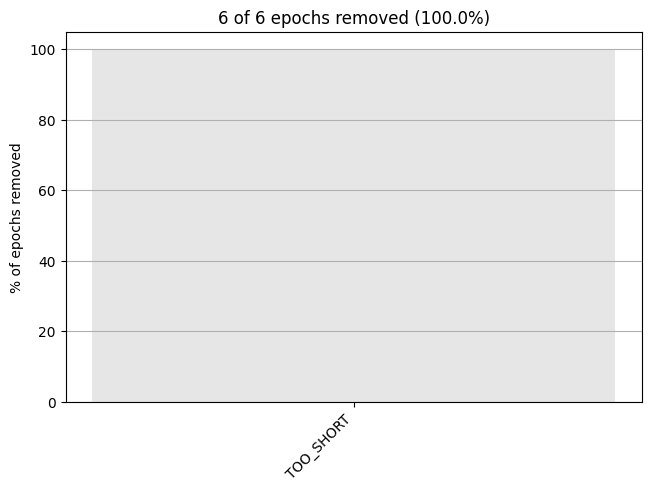

In [15]:
epochs.plot_drop_log()


In [17]:
# Load necessary libraries
import numpy as np
import pandas as pd
import mne
import pyxdf
import matplotlib.pyplot as plt
from scipy.fft import fft
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Define file path for the XDF file
file_path = '/content/drive/MyDrive/Colab Notebooks/sub-DataSSVEP551_ses-S005_task-Default_run-001_eeg.xdf'  # Adjust the file path as necessary

# Function to load data from an XDF file
def load_data(filepath):
    streams, header = pyxdf.load_xdf(filepath)

    eeg_stream = None
    marker_stream = None
    for stream in streams:
        if stream['info']['name'][0] == 'eeg' and stream['info']['type'][0] == 'signal':
            eeg_stream = stream
        elif stream['info']['type'][0] == 'Markers':
            marker_stream = stream

    if eeg_stream is None:
        raise ValueError(f"No stream named 'eeg' found in file {filepath}")

    data = eeg_stream['time_series']
    sampling_rate = float(eeg_stream['info']['nominal_srate'][0])
    channel_names = eeg_stream['info']['desc'][0]['channels'][0]['channel']
    channel_labels = [chan['label'][0] for chan in channel_names]
    df = pd.DataFrame(data, columns=channel_labels)

    markers = []
    if marker_stream:
        marker_times = marker_stream['time_stamps']
        marker_values = marker_stream['time_series']
        markers = list(zip(marker_times, marker_values))

    return df, sampling_rate, markers

# Function to create epochs from markers
def create_epochs(data, markers, sampling_rate, start_time=0, end_time=1):
    events = []
    for timestamp, marker in markers:
        try:
            event_value = int(marker[0])
            event_time = int(timestamp * sampling_rate)
            if any(event_time == e[0] for e in events):
                continue
            events.append([event_time, 0, event_value])
        except ValueError as e:
            print(f"Error converting marker {marker} at timestamp {timestamp}: {e}")

    events = np.array(events)

    if len(events) == 0:
        raise ValueError("No valid events were created from markers.")

    # Create MNE Raw object
    info = mne.create_info(ch_names=data.columns.tolist(), sfreq=sampling_rate, ch_types='eeg')
    raw = mne.io.RawArray(data.T, info)

    # Create epochs with adjusted rejection criteria
    try:
        epochs = mne.Epochs(
            raw,
            events,
            event_id=None,
            tmin=start_time,
            tmax=end_time,
            baseline=None,
            detrend=None,
            reject=dict(eeg=100e-6),  # Adjust rejection criteria
            reject_by_annotation=True,
            event_repeated='merge',
            preload=True
        )
        print(epochs.drop_log)  # Log dropped epochs
    except ValueError as e:
        print(f"Error creating epochs: {e}")
        return None

    return epochs  # Return created epochs

# Load data from XDF file
df, sampling_rate, markers = load_data(file_path)

# Show markers for verification
print("Markers from File:")
for timestamp, marker in markers:
    print(f"Timestamp: {timestamp:.2f}, Marker: {marker[0]}")

# Define the time window for epochs (in seconds)
start_time = 0  # Start of epoch
end_time = 0.5  # End of epoch

# Create epochs from markers
epochs = create_epochs(df, markers, sampling_rate, start_time, end_time)

if epochs is None:
    print("Error: Epochs creation failed.")
else:
    print(f"Number of epochs created: {len(epochs)}")
    print(f"Channels in epochs: {epochs.ch_names}")

# Select channels to plot
channels = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Plot Power Spectrum
if epochs is not None and len(epochs) > 0:
    plot_power_spectrum(epochs, channels, 'EEG Power Spectrum')
else:
    print("Error: No epochs available for analysis.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Markers from File:
Timestamp: 14329.45, Marker: 3
Timestamp: 14359.46, Marker: 13
Timestamp: 14359.46, Marker: 2
Timestamp: 14389.46, Marker: 12
Timestamp: 14389.46, Marker: 3
Timestamp: 14419.47, Marker: 13
Timestamp: 14419.47, Marker: 4
Timestamp: 14449.47, Marker: 14
Timestamp: 14449.47, Marker: 3
Timestamp: 14479.48, Marker: 13
Timestamp: 14479.48, Marker: 1
Creating RawArray with float64 data, n_channels=24, n_times=39372
    Range : 0 ... 39371 =      0.000 ...   153.793 secs
Ready.
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 6 events and 129 original time points ...
6 bad epochs dropped
(('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',))
Number of epochs created: 0
Channels in epochs: ['Channel 1', 'Channel 2', 'Ch

<ipython-input-17-20fd6f84a0dd>:69: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(


In [18]:
start_time = 0  # Start of epoch
end_time = 0.5  # End of epoch

In [20]:
reject=dict(eeg=100e-6)  # 100 microvolts


In [21]:
reject=None


In [22]:
print(epochs.drop_log)  # This will show you which epochs were dropped and why


(('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',), ('TOO_SHORT',))
